In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy.stats import mode, pearsonr
import csv
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import *
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

%matplotlib inline

In [3]:
# 对数据做抽样后保存
df = pd.read_csv('./data/train_fea_special.csv', sep=' ')
print(len(df))
df = df.sample(frac=0.3)
print(len(df))
df.to_csv('./data/train_fea_special_sample.csv', sep=' ', index=False)

1077175
323152


In [4]:
df = pd.read_csv('./data/round2_train_sample.txt', sep=' ')
dfA = pd.read_csv('./data/round2_ijcai_18_test_a_20180425.txt', sep=' ')
predictDf = pd.read_csv('./data/round2_ijcai_18_test_b_20180510.txt', sep=' ')
df = pd.concat([df,dfA,predictDf], ignore_index=True)
df['context_timestamp'] = df['context_timestamp'].map(lambda x: datetime.fromtimestamp(x))
df['date'] = pd.to_datetime(df.context_timestamp.dt.date)
df['hour'] = df.context_timestamp.dt.hour

In [32]:
print(pd.pivot_table(df, index=['date'], values='is_trade', aggfunc=np.mean))

            is_trade
date                
2018-08-31  0.012573
2018-09-01  0.013573
2018-09-02  0.013168
2018-09-03  0.012394
2018-09-04  0.011178
2018-09-05  0.009881
2018-09-06  0.005447
2018-09-07  0.046171


In [5]:
tempDf = df[~df.date.isin(['2018-09-04','2018-09-05','2018-09-06'])]
tempDf = pd.pivot_table(tempDf, index=['hour'], columns=['date'], values='is_trade', aggfunc=[np.mean,len])
# tempDf.reset_index(inplace=True)
print(tempDf)

           mean                                                    len  \
date 2018-08-31 2018-09-01 2018-09-02 2018-09-03 2018-09-07 2018-08-31   
hour                                                                     
0      0.009991   0.009071   0.012145   0.010739   0.050516     7407.0   
1      0.010776   0.011268   0.011768   0.011273   0.044369     3248.0   
2      0.013319   0.009857   0.012556   0.011791   0.041482     1877.0   
3      0.007680   0.013923   0.006973   0.012590   0.040201     1302.0   
4      0.009002   0.014650   0.010814   0.011927   0.045486     1333.0   
5      0.012573   0.009773   0.013055   0.016212   0.047672     2068.0   
6      0.011162   0.014859   0.016837   0.014741   0.045242     5644.0   
7      0.012868   0.013984   0.018899   0.016801   0.047285    10180.0   
8      0.015183   0.017746   0.018591   0.015855   0.047744    11592.0   
9      0.016654   0.016383   0.018840   0.016862   0.046114    13690.0   
10     0.016854   0.020359   0.017461 

In [6]:
tempDf.loc[:,pd.IndexSlice['mean','aver']] = tempDf.iloc[:,:4].apply(lambda x: x.mean(), axis=1)
print(tempDf)

                    mean                                          \
date 2018-08-31 00:00:00 2018-09-01 00:00:00 2018-09-02 00:00:00   
hour                                                               
0               0.009991            0.009071            0.012145   
1               0.010776            0.011268            0.011768   
2               0.013319            0.009857            0.012556   
3               0.007680            0.013923            0.006973   
4               0.009002            0.014650            0.010814   
5               0.012573            0.009773            0.013055   
6               0.011162            0.014859            0.016837   
7               0.012868            0.013984            0.018899   
8               0.015183            0.017746            0.018591   
9               0.016654            0.016383            0.018840   
10              0.016854            0.020359            0.017461   
11              0.016338            0.016933    

In [66]:
tempDf = tempDf['mean']
print('normal:',tempDf['aver'].mean())
print('normal am:',tempDf.loc[(tempDf.index>=9)&(tempDf.index<12)]['aver'].mean())
print('special am:',tempDf.loc[(tempDf.index>=9)&(tempDf.index<12)][pd.to_datetime('2018-09-07')].mean())
print('normal pm:',tempDf.loc[tempDf.index>=12]['aver'].mean())

normal: 0.012977824277614859
normal am: 0.016919732015040476
special am: 0.04480385932635705
normal pm: 0.01211631962929192


date  2018-08-31 00:00:00  2018-09-01 00:00:00  2018-09-02 00:00:00  \
hour                                                                  
0                0.009991             0.009071             0.012145   
1                0.010776             0.011268             0.011768   
2                0.013319             0.009857             0.012556   
3                0.007680             0.013923             0.006973   
4                0.009002             0.014650             0.010814   
5                0.012573             0.009773             0.013055   
6                0.011162             0.014859             0.016837   
7                0.012868             0.013984             0.018899   
8                0.015183             0.017746             0.018591   
9                0.016654             0.016383             0.018840   
10               0.016854             0.020359             0.017461   
11               0.016338             0.016933             0.016053   
12    

/home/lab-zhao.yinhu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


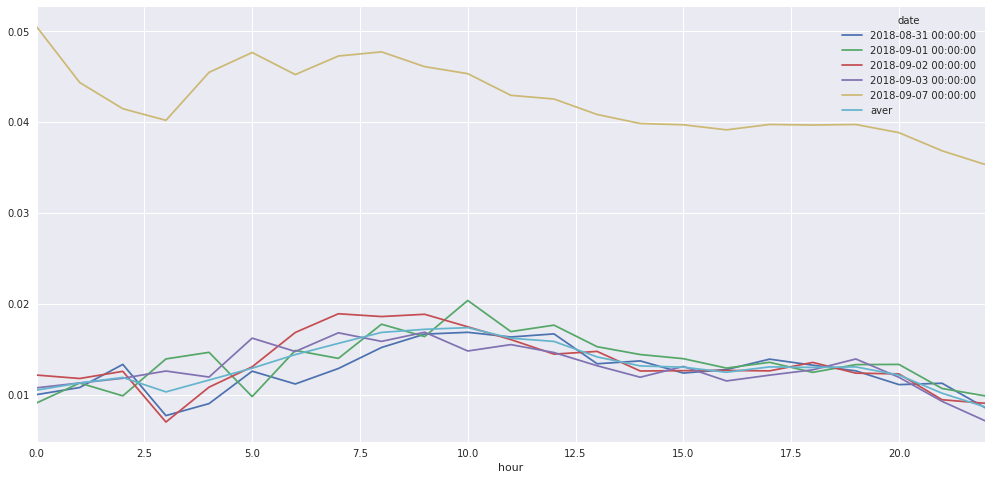

In [67]:
tempDf.loc[tempDf.index>11, pd.to_datetime('2018-09-07')] = tempDf.loc[tempDf.index>11, 'aver'] + 0.0267
print(tempDf)
print(tempDf.iloc[:-1].plot(figsize=(17,8)))